<a href="https://colab.research.google.com/github/penguinlin777/data_processing/blob/main/%E3%80%900311-0%E3%80%9120220317-0311-0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DanDan Requirements

2nd col -> 2nd maximum -> z

fig 1: x -> 4th col * 10 y -> 2nd

fig 2: x -> 1 / 开尔文(T) y -> 1 / z

fig 3: 拟合，GRG


In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter

# Read File
First, connect to google drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
FILE_PATH = "/content/drive/MyDrive/data/20220317-0311-0-uaud"  # change data floder path here

df_list = []
temp_list = []
END_ROWS = 3000 - 16
def temp_convertor(center_degree):
  return center_degree + 273

for file_name in os.listdir(FILE_PATH):
  df = pd.read_csv(FILE_PATH + "/" + file_name, sep='\s+|\t| ', 
        header=None, error_bad_lines=False, skiprows=16)
  df = df.iloc[:END_ROWS, 0:4]
  shape_x, shape_y = df.shape
  if shape_y != 4 or shape_y > 5000:
    print("file name:" + file_name)
    raise Exception("Wrong file format")
  df_list.append(df)
  # 从文件名中提取温度值，根据文件名选用下面的语句
  # converted_name = file_name[0:file_name.find('_')] # Option 1
  converted_name = file_name[0:file_name.find('.')] # Option 2
  temp_list.append(temp_convertor(int(converted_name)))

for df, file_name in zip(df_list, os.listdir(FILE_PATH)):
  print(file_name)
  print(df.head(3))

print(temp_list)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


210.plt
       0          1          2         3
0  0.002   0.012757   0.000000  0.000142
1  0.003   6.025301   0.000000  0.000213
2  0.004  13.441949  45.211928  0.000284
215.plt
       0          1           2         3
0  0.002   2.020750    0.000000  0.000142
1  0.003  58.075909    0.000000  0.000213
2  0.004  80.325844  110.522208  0.000284
285.xls
       0          1          2         3
0  0.002   1.995237   0.000000  0.000142
1  0.003  46.025303   0.000000  0.000213
2  0.004  53.441952  90.149445  0.000284
275.xls
       0           1           2         3
0  0.002  154.078094    0.000000  0.000142
1  0.003   52.050606    0.000000  0.000213
2  0.004   66.883904  100.851581  0.000284
270.xls
       0           1          2         3
0  0.002  152.095596   0.000000  0.000142
1  0.003   12.050601   0.000000  0.000213
2  0.004   26.883898  63.939321  0.000284
265.xls
       0          1          2         3
0  0.002   0.012757   0.000000  0.000142
1  0.003   6.025301   0.000000  0.

# Fig 1

x: 4th col * 10 

y: 2nd

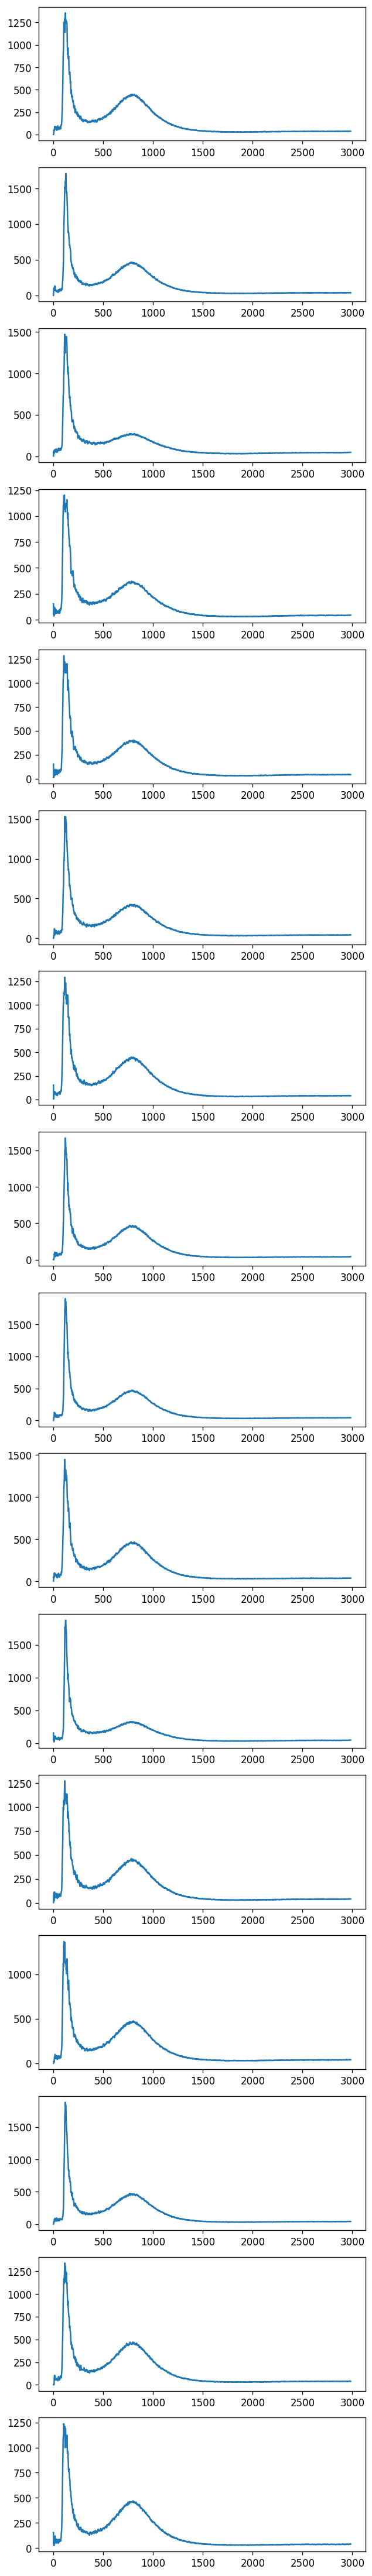

In [4]:
# sns.set()
sns.reset_orig()

# set figure size
plt.figure(figsize=(6, 3 * len(df_list)),dpi=120)

for i, df in enumerate(df_list):
  plt.subplot(len(df_list), 1, i + 1)
#  plt.plot(df.iloc[:, 3] * 10, df.iloc[:, 1])   # Option 1: real x axis
  plt.plot(range(len(df.iloc[:, 1])), df.iloc[:, 1])  # Option 2: index

# Fig 2
Find second peaks with scipy

In [ ]:
# Option1: scipy find_peaks

# second_peaks = []
# peaks_value = []

# for i, df in enumerate(df_list):
#   data = df.iloc[:, 1]
#   res, _ = find_peaks(data, height=500, distance=100)

#   if len(res) != 2:
#     raise Exception("Find peaks error, you need to adjust parameters in find_peaks")
#   second_peaks.append([res[1], data[res[1]]])
#   peaks_value.append(data[res[1]])

# print(second_peaks)

In [5]:
# Option 2: region maximum

REGION_START = 500
REGION_END = 1000

peaks_value = []

for df in df_list:
  data = df.iloc[:, 1]
  peaks_value.append(max(data[REGION_START:REGION_END]))

print(peaks_value)

[449.611389, 464.512512, 274.323273, 371.983551, 403.826019, 426.123016, 449.659912, 469.47464, 472.111053, 468.769073, 326.963165, 462.725616, 476.142303, 474.533081, 469.815735, 469.36438]


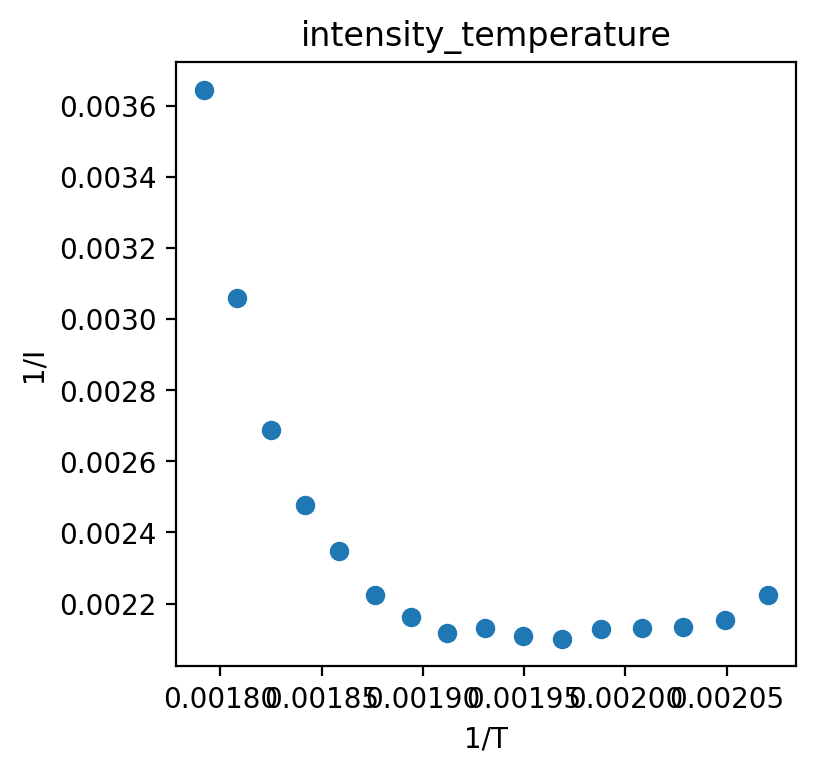

In [6]:
x = [1 / temp for temp in temp_list]
y = [1 / peak for peak in peaks_value]
# 画布大小 figsize, 清晰度 dpi
plt.figure(figsize=(4, 4),dpi=200)
# 图片标题 
plt.title('intensity_temperature')
# 轴标题
plt.xlabel('1/T')
plt.ylabel('1/I')
# 画布粗细和刻度

plt.scatter(x, y, linewidth = 1.0, linestyle = '-')
plt.show()

[(0.0017921146953405018, 0.0036453341674732792), (0.0018083182640144665, 0.0030584484952609265), (0.0018248175182481751, 0.0026882909131645985), (0.001841620626151013, 0.002476313939543356), (0.0018587360594795538, 0.0023467401723261997), (0.001876172607879925, 0.0022239029393396315), (0.001893939393939394, 0.0021611079339943005), (0.0019120458891013384, 0.002118145706705155), (0.0019305019305019305, 0.002130040506554305), (0.001949317738791423, 0.0021073346412281003), (0.001968503937007874, 0.002100212465263772), (0.0019880715705765406, 0.002128494057356338), (0.002008032128514056, 0.0021305408816919597), (0.002028397565922921, 0.0021332465335229143), (0.0020491803278688526, 0.002152794540871269), (0.002070393374741201, 0.002224142947588901)]


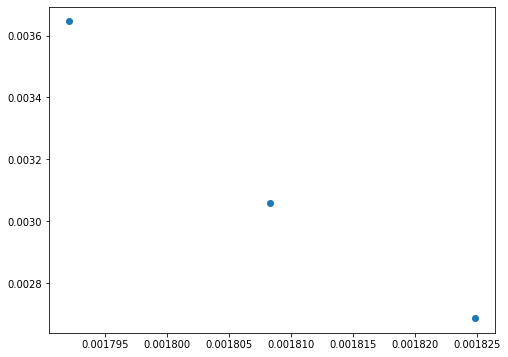

In [8]:
# sort
def sort_data(x, y):
  xy = [(xi, yi) for xi, yi in zip(x, y)]
  sorted_xy = sorted(xy, key=lambda item: item[0])
  print(sorted_xy)

  return [xi for xi, _ in sorted_xy], [yi for _, yi in sorted_xy]

x, y = sort_data(x, y)

plt.figure(figsize=(8, 6))
plt.scatter(x[0:], y[0:])
plt.show()

# Fig 3

249.0648989989768


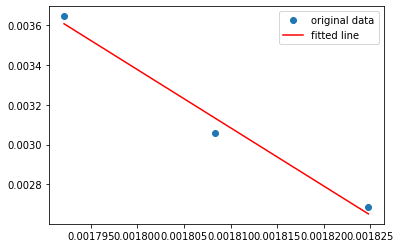

In [10]:
# linear regression

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import optimize
from scipy.optimize import leastsq

x_fit = x[:3]
y_fit = y[:3]
# z1 = np.polyfit(x_fit, y_fit, 1)
# p1 = np. poly1d(z1)
# y_fitted = p1(x_fit)
# plt.scatter(x_fit, y_fit)
# plt.plot(x_fit, y_fitted)
# plt.show
res = st.linregress(x_fit, y_fit)
plt.plot(x_fit, y_fit, 'o', label='original data')
plt.plot(x_fit, res.intercept + res.slope*np.array(x_fit), 'r', label='fitted line')
print(1/(res.intercept/((-1)*res.slope))-273)
#print(res.intercept)
plt.legend()
plt.show()

# Fig 4

Fitting

Equations: @dandan

Objective:

The minimum of [the sum of least squares] for I_q_fit and I_q
note:

1. in dandan's case the subscript PMMA is PAGE
2. q is the forth column * 10
3. need rewrite: df.iloc[:, 3] * 10 is q; df.iloc[:, 1] is I_q
altering parameters (the last equation):
  - b_PS
  - b_PAGE
  - A_0
  - chi

Inputs: 
- M_w
- M_n
- M_n_PS
- a_1
- b_5
- m_S
- m_A
- rho_PS
- rho_PAGE
- v_nor = 118

Equation:
- w_PS = (m_S * b_5 / 5) / (m_A * a_1 + m_S * b_5 / 5)
- f_PS = w_PS / rho_PS / (w_PS / rho_PS + (1 - w_PS) / rho_PAGE)
- D_PS = D_PAGE = 1+(M_w / M_n - 1) / (w_PS ** 2 + (1 - w_PS))
- v_PS = m_S / rho_PS /  0.602
- v_PAGE = m_A / rho_PAGE / 0.602
- N_PS = v_PS * M_n_PS / v_nor / m_S
- N_PAGE = v_PAGE * (M_n - M_n_PS) / v_nor / m_A
- y_PS = N_PS * b_PS ** 2 * q ** 2 / 6
- y_PAGE = N_PAGE * b_PAGE ** 2 * q ** 2 / 6
- g1_PS = (1 - (y_PS * (D_PS - 1) + 1) ** ((D_PS - 1) ** -1)) / y_PS
- g1_PAGE = (1 - (y_PAGE * (D_PAGE - 1) + 1) ** ((D_PAGE - 1) ** -1)) / y_PAGE
- g2_PS = 2 * (-1 + y_PS + (y_PS * (D_PS - 1) + 1) ** ((D_PS - 1) ** -1)) / y_PS ** 2
- g2_PAGE = 2 * (-1 + y_PAGE + (y_PAGE * (D_PAGE - 1) + 1) ** ((D_PAGE -1) ** -1)) / y_PAGE ** 2
- rc = (v_PS * N_PS + v_PAGE * N_PAGE) / (v_PS * v_PAGE) ** 1/2
- s_PS_PS = rc * f_PS ** 2 * g2_PS
- s_PAGE_PAGE = rc * (1 - f_PS) ** 2 * g2_PS
- s_PS_PAGE = rc * f_PS * (1 - f_PS) * g1_PS * g1_PAGE
- S_q = s_PS_PS + 2 * s_PS_PAGE + s_PAGE_PAGE
- W_q = s_PS_PS * s_PAGE_PAGE - s_PS_PAGE ** 2
- I_q_fit = A_0 / (S_q / W_q - 2 * chi)

# Fig 5

Gaussian fitting of second peak in Fig 1

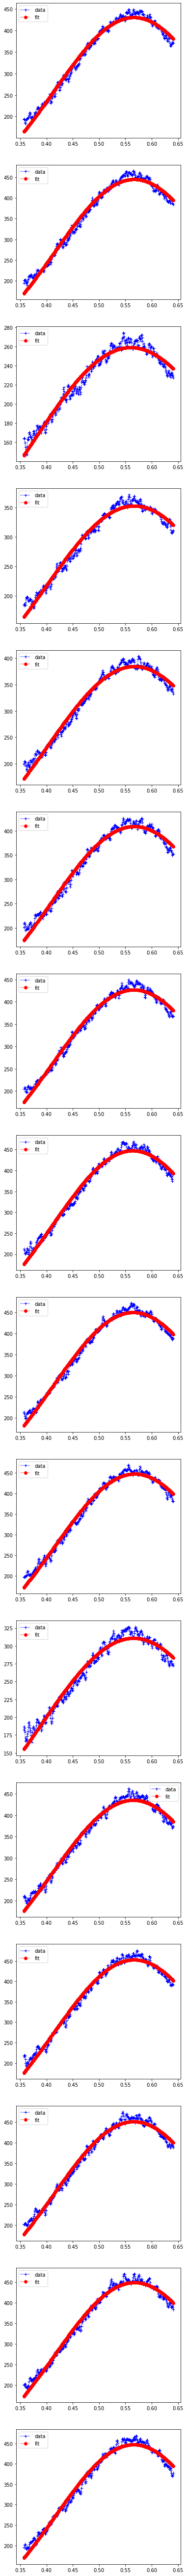

In [11]:
from scipy.optimize import curve_fit
import warnings
import numpy as np

warnings.filterwarnings('ignore')

START_REGION = 550
END_REGION  = 950

def gaus(x, a, x0, sigma):
  return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

plt.figure(figsize=(6, 6 * len(df_list)))

fit_opt = []  # fitting parameters

for i, df in enumerate(df_list):
  plt.subplot(len(df_list), 1, i + 1)
  x = df.iloc[START_REGION: END_REGION, 3] * 10
  y = df.iloc[START_REGION: END_REGION, 1]

  n = len(x)                    
  mean = sum(x * y) / sum(y)
  sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

  popt, pcov = curve_fit(gaus, x, y, p0=[1, mean, sigma])
  fit_opt.append(popt)
  # popt是优化之后的三个参数，直接带入gauss使用
  plt.plot(x, y, 'b+:', label='data')
  plt.plot(x, gaus(x, *popt), 'ro:', label='fit')
  plt.legend()

FWHM:0.35682
FWHM:0.35746
FWHM:0.46528
FWHM:0.40478
FWHM:0.39353
FWHM:0.38245
FWHM:0.37085
FWHM:0.35883
FWHM:0.36501
FWHM:0.36004
FWHM:0.42485
FWHM:0.36574
FWHM:0.36109
FWHM:0.36229
FWHM:0.36059
FWHM:0.35401


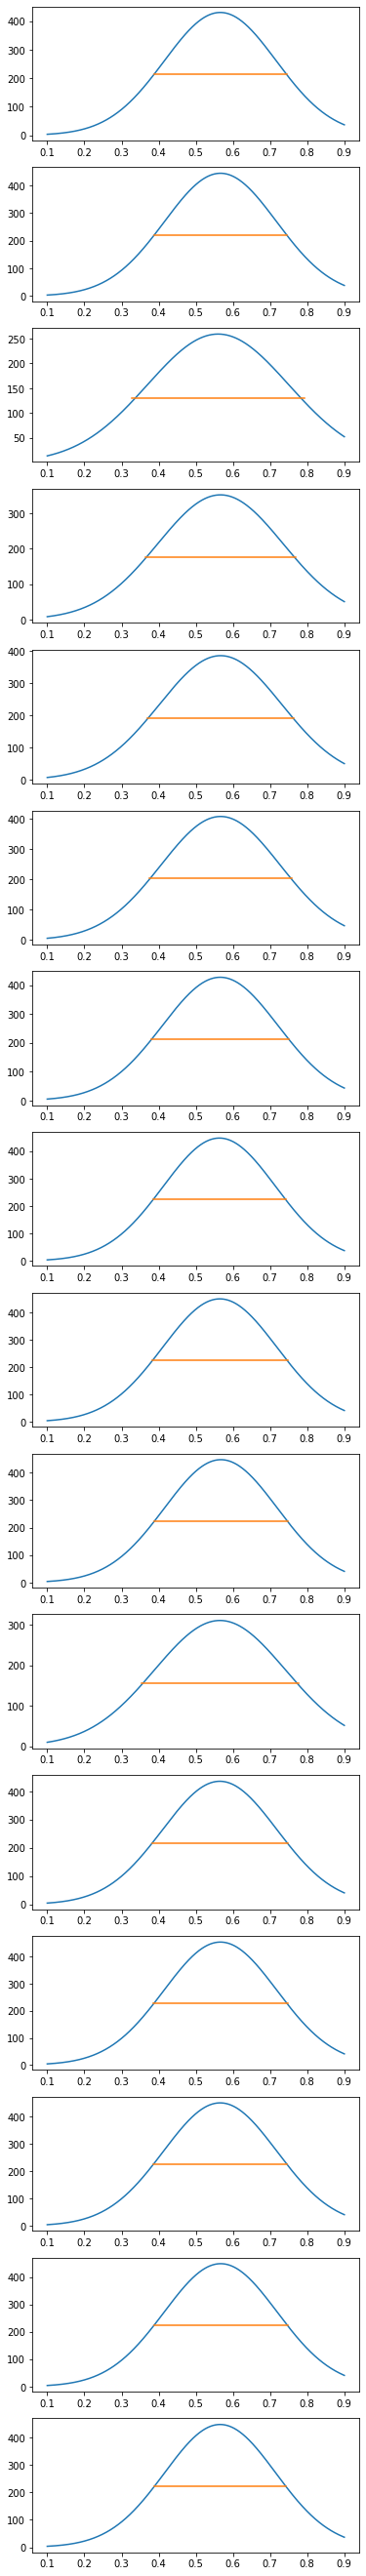

In [15]:
# 峰值的半峰宽度
def peak(x, c):
  return np.exp(-np.power(x - c, 2) / 16.0)

def lin_interp(x, y, i, half):
  return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
  half = (max(y) - min(y)) / 2.0
  signs = np.sign(np.add(y, -half))
  zero_crossings = (signs[0:-2] != signs[1:-1])
  zero_crossings_i = np.where(zero_crossings)[0]
  
  if len(zero_crossings_i) != 2:
    raise Exception("You should check START_GEN and END_GEN")
  
  return [lin_interp(x, y, zero_crossings_i[0], half), lin_interp(x, y, zero_crossings_i[1], half)]

START_GEN = 0.1   # region start and end
END_GEN = 0.9
hw_result = []    # store result

plt.figure(figsize=(6, 3 * len(df_list)))

for i, opt in enumerate(fit_opt):
  x = np.linspace(START_GEN, END_GEN, 1000)
  y = gaus(x, *opt)

  # find the two crossing points
  hmx = half_max_x(x, y)

  # print the answer
  fwhm = hmx[1] - hmx[0]
  hw_result.append(fwhm)
  print("FWHM:{:.5f}".format(fwhm))

  # a convincing plot
  half = max(y) / 2.0

  # plot
  plt.subplot(len(df_list), 1, i + 1)
  plt.plot(x, y)
  plt.plot(hmx, [half, half])

# Fig 6

[(210, 2.8025431752994727), (215, 2.797513324088173), (220, 2.777487092216774), (225, 2.8247425044437557), (230, 2.7732078701929095), (235, 2.769407411617788), (240, 2.7602397064473094), (245, 2.7868696810612876), (250, 2.739617946266892), (255, 2.734211198695486), (260, 2.6965175660693737), (265, 2.6146881119474212), (270, 2.541105012316356), (275, 2.470490891471651), (280, 2.35374903387873), (285, 2.1492310300204873)]


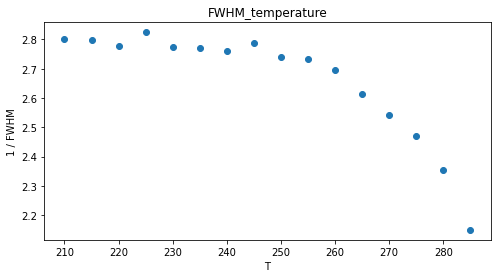

            0
2.802543  210
2.797513  215
2.777487  220
2.824743  225
2.773208  230
2.769407  235
2.760240  240
2.786870  245
2.739618  250
2.734211  255
2.696518  260
2.614688  265
2.541105  270
2.470491  275
2.353749  280
2.149231  285


In [16]:
from tabulate import tabulate

x = [temp - 273 for temp in temp_list]
y = [1 / hw for hw in hw_result]

x, y = sort_data(x, y)

# 画布大小 figsize, 清晰度 dpi
plt.figure(figsize=(8, 4))
# 图片标题 
plt.title('FWHM_temperature')
# 轴标题
plt.xlabel('T')
plt.ylabel('1 / FWHM')
# 画布粗细和刻度
plt.scatter(x[0:], y[0:], linewidth = 1.0, linestyle = '-')
plt.show()
df = pd.DataFrame(x[0:],y[0:])
print(df)

# Fig 7

x = 261.7902458326217, y = 2.7212942893747263


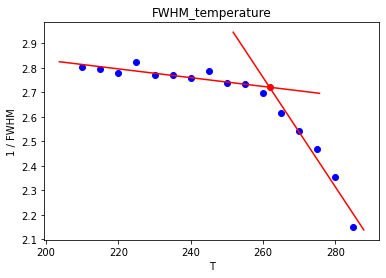

In [25]:
import numpy as np
import sympy

x_fit1 = x[0:11]
y_fit1 = y[0:11]

res1 = st.linregress(x_fit1, y_fit1)
plt.scatter(x_fit1, y_fit1, color='b', label='original data')
x_fitted1 = np.linspace(0.97 * x_fit1[0], 1.06 * x_fit1[len(x_fit1) - 1], 20)   # x coordination
plt.plot(x_fitted1, res1.intercept + res1.slope*np.array(x_fitted1), 'r', label='fitted line')

x_fit2 = x[11:]
y_fit2 = y[11:]
res2 = st.linregress(x_fit2, y_fit2)
plt.scatter(x_fit2, y_fit2, color='b', label='original data')
x_fitted2 = np.linspace(0.95 * x_fit2[0], 1.01 * x_fit2[len(x_fit2) - 1], 20)   # x coordination
plt.plot(x_fitted2, res2.intercept + res2.slope*np.array(x_fitted2), 'r', label='fitted line')

# cal intersection
inter_x = (res1.intercept - res2.intercept) / (res2.slope - res1.slope)
inter_y = res2.intercept + res2.slope * inter_x
plt.scatter(inter_x, inter_y, color='r')
# plt.figure(figsize=(6, 4),dpi=200)

# 图片标题 
plt.title('FWHM_temperature')
# 轴标题
plt.xlabel('T')
plt.ylabel('1 / FWHM')
print(f'x = {inter_x}, y = {inter_y}')